# **Introduction to Machine Learning with Jupyter Notebooks**
Welcome to the world of Machine Learning. This instructional materials will guide you to learn machine learning using Jupyter Notebook.

## **Getting Started**
### **1. Setting Up Your Environment**
Before we go deep into machine learning, you'll need to set up your environment.
follow these steps to set up your environment.

**Install Jupyter Notebook**:

Install the classic Jupyter Notebook by writting the below command in your terminal:

`pip install notebook`

### **2. Launching Jupyter Notebook**

To run the notebook:

`jupyter notebook`

or if this doesnt work, write this insteade.

`python -m notebook`

## **Basics of Machain Learning (ML)**
### **What is Machine Learning?**
It is a subset of Artificial Inteligence (AI). It focuses on making a model capable of learning from data to make predictions or decisions.

### **Types of Machaine Learning:**
1. *Supervised Learning*: Learning from labeled data (e.g., classification, regression).
2. *Unsupervised Learning*: Finding patterns in unlabeled data (e.g., clustering, dimensionality reduction).
3. *Reinforcement Learning*: Learning through rewards and punishments.

## **Building your first ML Model**

**Task**: Develop a weather forecasting model capable of predicting
weather conditions, including sunny, cloudy, rainy, foggy, etc.

**Objective**:
Develop instructional materials for students to learn machine learning using
Jupyter Notebook and other ML tools. Use a weather forecasting model as an
example, incorporating TensorFlow and a Decision Tree Classifier. The aim is
to accurately predict weather conditions and display predictions such as
sunny, cloudy, rainy, and foggy.


**Tools and Technologies**:
1. *Jupyter Notebook*: For data preprocessing, model development, and
training.
2. *Programming Language*: Python - Widely used for its simplicity,
extensive libraries, and ecosystem support.
3. *TensorFlow*: For building and training the weather prediction model.
4. *NumPy*: For numerical computations and data manipulation.
5. *Pandas*: For data manipulation and analysis.


## **Task Steps:**

### **1. Import libraries:**
We will import the necessary libraries first

In [1]:
!pip install tensorflow

In [2]:
!pip install seaborn

In [3]:
!pip install scikit-learn

In [4]:
!pip install micromlgen

  Preparing metadata (setup.py) ... done
  Created wheel for micromlgen: filename=micromlgen-1.1.28-py3-none-any.whl size=32152 sha256=0004e20b26a748989a91938b095a57ea272e21f7b751f1deb19968b53ce397dc
  Stored in directory: /root/.cache/pip/wheels/97/54/64/5d82c310920abe1be0d120313ceb9e12c88f5701f53f6ed248
Successfully built micromlgen


In [5]:
import pandas as pd     # for data acquisition
import numpy as np      # for data processing
import tensorflow as tf # for making the model

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from micromlgen import port
from sklearn import metrics
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### **2. Dataset Acquisition:**
We will use the provided rainfall dataset for this project.


In [7]:
data = pd.read_csv('rainfall.csv')  # Load the dataset

In [8]:
data.head(5)  # Display the first few rows of the dataset

,datetime,temp,dew,humidity,sealevelpressure,winddir,solarradiation,windspeed,precipprob,preciptype
0,01-01-2016,28.4,11.9,37.8,1016.4,147.5,216.1,16.6,0,0
1,02-01-2016,26.8,13.0,44.8,1017.2,110.3,215.7,16.6,0,0
2,03-01-2016,25.5,14.6,52.8,1015.7,145.3,221.1,18.4,0,0
3,04-01-2016,26.4,13.1,46.6,1015.3,126.9,216.2,16.6,0,0
4,05-01-2016,27.1,13.5,44.9,1014.4,125.5,208.1,16.6,0,0


**Heat Index function**

In [9]:
def calculate_heat_index(row):
    temperature = row['temp']
    humidity = row['humidity']
    # Coefficients for the heat index formula
    c1 = -42.379
    c2 = 2.04901523
    c3 = 10.14333127
    c4 = -0.22475541
    c5 = -6.83783e-3
    c6 = -5.481717e-2
    c7 = 1.22874e-3
    c8 = 8.5282e-4
    c9 = -1.99e-6

    # Calculate the heat index
    heat_index = (c1 + (c2 * temperature) + (c3 * humidity) + (c4 * temperature * humidity) +
                  (c5 * temperature**2) + (c6 * humidity**2) +
                  (c7 * temperature**2 * humidity) + (c8 * temperature * humidity**2) +
                  (c9 * temperature**2 * humidity**2))

    # Adjustments for specific conditions
    if humidity < 13 and (80 <= temperature <= 112):
        adjustment = ((13 - humidity) / 4) * ((17 - abs(temperature - 95.0)) / 17)**0.5
        heat_index -= adjustment
    elif humidity > 85 and (80 <= temperature <= 87):
        adjustment = ((humidity - 85) / 10) * ((87 - temperature) / 5)
        heat_index += adjustment

    return heat_index


In [10]:
# Apply the function to the DataFrame to create the 'heat_index' column
data['heat_index'] = data.apply(calculate_heat_index, axis=1)

In [11]:
# Display the updated DataFrame
print(data.head(20))

      datetime  temp   dew  humidity  sealevelpressure  winddir  \
0   01-01-2016  28.4  11.9      37.8            1016.4    147.5   
1   02-01-2016  26.8  13.0      44.8            1017.2    110.3   
2   03-01-2016  25.5  14.6      52.8            1015.7    145.3   
3   04-01-2016  26.4  13.1      46.6            1015.3    126.9   
4   05-01-2016  27.1  13.5      44.9            1014.4    125.5   
5   06-01-2016  26.9  14.3      48.2            1014.2    110.2   
6   07-01-2016  26.1  17.0      58.0            1015.1    149.4   
7   08-01-2016  26.6  16.5      55.2            1015.4    157.7   
8   09-01-2016  26.3  13.5      47.6            1013.8    117.5   
9   10-01-2016  26.0  12.5      45.3            1014.2    124.7   
10  11-01-2016  26.1  14.6      50.4            1014.3    153.7   
11  12-01-2016  25.1  17.5      64.5            1013.1    200.7   
12  13-01-2016  24.6  17.0      64.0            1012.5    195.6   
13  14-01-2016  23.9  16.5      64.2            1012.6    158.

In [12]:
def determine_weather(row):
    temp_c = row['temp']
    humidity = row['humidity']
    heat_index_c = row['heat_index']
    # Determine weather condition
    if humidity >= 80 and temp_c < 24:
        weather = 1 # "Foggy"
    elif humidity >= 80 and heat_index_c > temp_c:
        weather = 2 # "Rainy"
    elif 50 <= humidity < 80:
        weather = 3 # "Cloudy"
    else:
        weather = 4 # "Sunny"

    return weather

In [13]:
# Apply the function to the DataFrame to create the 'weather' column
data['weather'] = data.apply(determine_weather, axis=1)

# Display the updated DataFrame
print(data.head(20))

      datetime  temp   dew  humidity  sealevelpressure  winddir  \
0   01-01-2016  28.4  11.9      37.8            1016.4    147.5   
1   02-01-2016  26.8  13.0      44.8            1017.2    110.3   
2   03-01-2016  25.5  14.6      52.8            1015.7    145.3   
3   04-01-2016  26.4  13.1      46.6            1015.3    126.9   
4   05-01-2016  27.1  13.5      44.9            1014.4    125.5   
5   06-01-2016  26.9  14.3      48.2            1014.2    110.2   
6   07-01-2016  26.1  17.0      58.0            1015.1    149.4   
7   08-01-2016  26.6  16.5      55.2            1015.4    157.7   
8   09-01-2016  26.3  13.5      47.6            1013.8    117.5   
9   10-01-2016  26.0  12.5      45.3            1014.2    124.7   
10  11-01-2016  26.1  14.6      50.4            1014.3    153.7   
11  12-01-2016  25.1  17.5      64.5            1013.1    200.7   
12  13-01-2016  24.6  17.0      64.0            1012.5    195.6   
13  14-01-2016  23.9  16.5      64.2            1012.6    158.

**Data Preprocessing & Visualization**:

Handle missing values and encode categorical variables.

In [14]:
# Dataset Preprocessing
X = data[['temp', 'humidity', 'heat_index']] #features
y = data['weather'] #target


<Axes: >

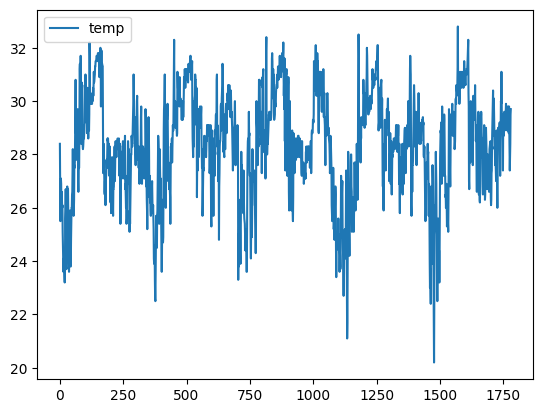

In [15]:
X[['temp']].plot()  # plot of temperature

<Axes: >

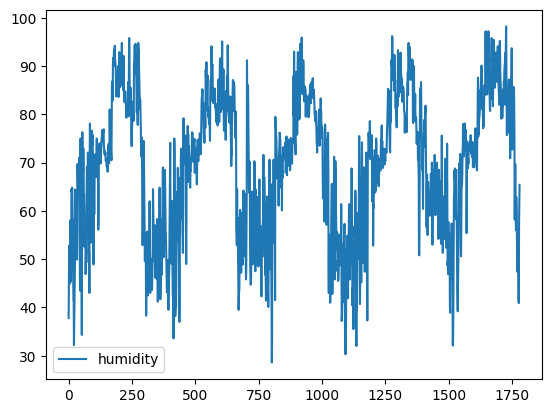

In [16]:
X[['humidity']].plot() # plot of humidity

<Axes: >

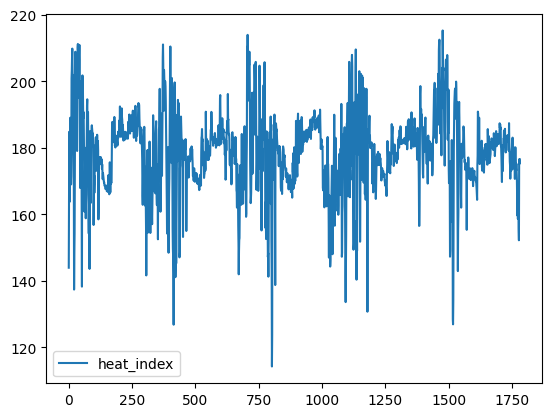

In [17]:
X[['heat_index']].plot()  # plot of heat index

In [18]:
data.nunique()  # finding for the count of unique values

datetime            1781
temp                 107
dew                  184
humidity             546
sealevelpressure     177
winddir             1089
solarradiation      1194
windspeed            172
precipprob             2
preciptype             2
heat_index          1708
weather                4
dtype: int64

In [19]:
data.shape # gives the shape of data

(1781, 12)

In [20]:
data.columns # gives the columns of data

Index(['datetime', 'temp', 'dew', 'humidity', 'sealevelpressure', 'winddir',
       'solarradiation', 'windspeed', 'precipprob', 'preciptype', 'heat_index',
       'weather'],
      dtype='object')

In [21]:
data.info() # All information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          1781 non-null   object 
 1   temp              1781 non-null   float64
 2   dew               1781 non-null   float64
 3   humidity          1781 non-null   float64
 4   sealevelpressure  1781 non-null   float64
 5   winddir           1781 non-null   float64
 6   solarradiation    1781 non-null   float64
 7   windspeed         1781 non-null   float64
 8   precipprob        1781 non-null   int64  
 9   preciptype        1781 non-null   int64  
 10  heat_index        1781 non-null   float64
 11  weather           1781 non-null   int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 167.1+ KB


In [22]:
data= data[["temp","humidity","heat_index","weather"]] # taking only the required data

In [23]:
data.head()  # shows some data from starting

,temp,humidity,heat_index,weather
0,28.4,37.8,143.886492,4
1,26.8,44.8,164.714809,4
2,25.5,52.8,184.766321,3
3,26.4,46.6,169.873735,4
4,27.1,44.9,163.735238,4


In [24]:
data.info()  # again checking the data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        1781 non-null   float64
 1   humidity    1781 non-null   float64
 2   heat_index  1781 non-null   float64
 3   weather     1781 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 55.8 KB


In [25]:
data.isna().sum() # searching for null values

temp          0
humidity      0
heat_index    0
weather       0
dtype: int64

In [26]:
data.duplicated().sum() # searching for the duplicate values

73

In [27]:
data.drop_duplicates(inplace=True)  # deleting the duplicate values
data.shape

(1708, 4)

In [28]:
data["weather"].unique() # gives the unique values of weather

array([4, 3, 2, 1])

<Axes: xlabel='weather'>

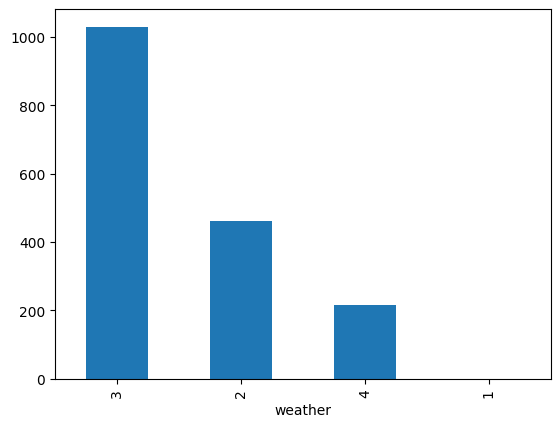

In [29]:
data["weather"].value_counts().plot.bar()  # plot of weather

In [30]:
data["weather"].value_counts()  # gives the value count of every unique weather conditions

weather
3    1030
2     462
4     215
1       1
Name: count, dtype: int64

**A Seaborn heatmap is a data visualization tool that displays a matrix of values as a grid of colors, making it easy to identify patterns, correlations, and variations in the data. It is particularly useful for visualizing correlation matrices, confusion matrices, and other types of matrix data.**

<Axes: >

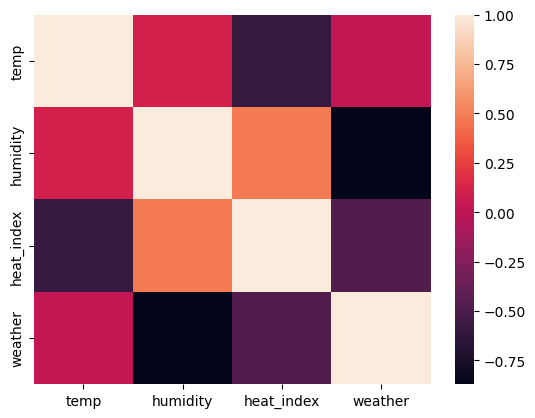

In [31]:
sns.heatmap(data.corr())  # plot the heat map of the data

In [32]:
# Fill missing values
data.fillna(method='ffill', inplace=True)

In [33]:
# Convert all feature columns to numeric
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [34]:
# Fill any remaining NaNs that might have been introduced
data.fillna(0, inplace=True)

In [35]:
# Encode the target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['weather'] = label_encoder.fit_transform(data['weather'])

In [36]:
# Define features and target
X = data.drop('weather', axis=1)
y = data['weather']

### **3. Model Development:**
Split the dataset into training and testing sets, and implement a Decision Tree Classifier using TensorFlow.

In [37]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Build the Decision Tree Classifier model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

In [39]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### **4. Model Training**
Train the model using the training data and monitor its performance.

In [40]:
X = data.loc[:,["temp","humidity","heat_index"]]

In [41]:
X

,temp,humidity,heat_index
0,28.4,37.8,143.886492
1,26.8,44.8,164.714809
2,25.5,52.8,184.766321
3,26.4,46.6,169.873735
4,27.1,44.9,163.735238
...,...,...,...
1776,27.4,41.5,155.554949
1777,28.0,40.9,152.141608
1778,28.4,56.9,176.390640
1779,29.5,61.3,175.058042


In [42]:
y = data.iloc[:,3].astype(int)

In [43]:
y

0       3
1       3
2       2
3       3
4       3
       ..
1776    3
1777    3
1778    2
1779    2
1780    2
Name: weather, Length: 1708, dtype: int64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [45]:
X_train.values.tolist()

[[30.6, 43.6, 148.332029087616],
 [24.8, 52.3, 187.297434546036],
 [28.4, 84.0, 182.19137140239997],
 [29.3, 67.7, 179.52995468958096],
 [29.7, 79.3, 176.93902395398095],
 [27.0, 91.7, 184.24546479339998],
 [29.0, 80.6, 180.4729137591999],
 [30.4, 52.5, 162.3225732977],
 [30.7, 58.3, 166.97964945050097],
 [30.0, 69.3, 176.2498986317],
 [27.3, 93.2, 180.50731777015588],
 [29.1, 54.4, 170.2930334499959],
 [25.7, 76.3, 201.71453019242102],
 [28.8, 78.0, 182.62592425520003],
 [27.9, 84.8, 184.744815793804],
 [29.1, 69.6, 181.15321959815594],
 [28.0, 72.2, 187.75932743919995],
 [27.0, 43.1, 160.44603954459996],
 [27.3, 48.5, 169.57452343592502],
 [27.2, 90.7, 184.03045625259588],
 [29.0, 78.2, 181.39578888879996],
 [28.3, 76.4, 185.92375197084388],
 [23.5, 45.8, 180.48299488840004],
 [29.9, 45.6, 154.29900700615602],
 [29.2, 47.6, 160.29754251846398],
 [28.7, 72.0, 183.76573311310005],
 [31.3, 71.0, 169.62703171479993],
 [27.2, 63.3, 188.33850374851602],
 [28.7, 77.5, 183.347101592925],
 [2

In [46]:
# Convert to Pandas Series if y_train is a NumPy array
if isinstance(y_train, np.ndarray):
    y_train = pd.Series(y_train)

In [47]:
# Now you can use y_train.values.tolist() if necessary
y_train_list = y_train.values.tolist()
print(y_train_list)

[3, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 3, 3, 1, 2, 2, 3, 3, 3, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 3, 1, 1, 2, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 3, 2, 1, 1, 2, 1, 2, 1, 1, 2, 3, 3, 1, 3, 3, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 3, 3, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 3, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 3, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 3, 2, 1, 1, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 3, 2, 1, 1, 2, 2, 1, 3, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 3, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 3, 3, 1, 3, 1, 2, 2, 2, 3, 1, 2, 1, 2, 1, 2, 2, 3, 2, 2, 2, 3, 3, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 3, 2, 2, 2, 1, 2, 2, 1, 3, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 3, 2, 3, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 3, 3, 2, 1, 2, 2, 3, 1, 2, 3, 2, 2, 1, 2, 2, 2, 1, 1, 

In [48]:
weather_classifier = DecisionTreeClassifier(random_state = 0)
weather_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [49]:
type(weather_classifier)

sklearn.tree._classes.DecisionTreeClassifier

### **5. Model Evaluation**
Evaluate the model's performance using metrics such as accuracy, precision, recall, and F1-score.

In [50]:
# Make predictions
y_pred_array = weather_classifier.predict(X_test)

In [51]:
# Ensure y_test is a Pandas Series to access its index
if isinstance(y_test, np.ndarray):
    y_test = pd.Series(y_test)

In [52]:
# Create DataFrame from the predictions
y_pred = pd.DataFrame(y_pred_array, columns=["weather"])

In [53]:
# Set the index of the DataFrame to match y_test index
y_pred.index = y_test.index

In [54]:
# Ensure the data type is int
y_pred = y_pred.astype(int)

In [55]:
print(y_pred)

      weather
571         1
1369        2
1394        2
115         2
456         2
...       ...
1730        2
873         2
1083        3
1733        2
329         3

[513 rows x 1 columns]


In [56]:
y_test = np.array(y_test,dtype = int)

In [57]:
type(y_test)

numpy.ndarray

In [58]:
y_test

array([1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 3, 1, 3, 1, 3,
       2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 3, 2, 2, 2,
       2, 2, 3, 3, 3, 1, 1, 2, 2, 2, 1, 2, 3, 2, 2, 1, 1, 1, 3, 1, 3, 2,
       2, 1, 1, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 1, 1, 3, 2,
       2, 2, 1, 2, 2, 1, 1, 2, 3, 2, 2, 3, 1, 2, 2, 1, 2, 2, 1, 2, 3, 2,
       2, 2, 2, 1, 1, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 3,
       2, 2, 2, 1, 2, 1, 3, 1, 2, 3, 1, 1, 2, 1, 2, 3, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 3, 3, 3, 1, 2, 3, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 3, 2, 1, 2, 3, 1, 2, 2, 2, 2, 3, 2, 2, 2, 3, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 3, 2, 1, 2, 2, 3, 2, 1, 2, 1, 3, 1, 2, 1, 1, 2, 2,
       1, 1, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2, 1, 2, 2, 3, 2, 3, 1, 2, 2,
       1, 2, 1, 2, 1, 2, 2, 1, 2, 3, 2, 1, 1, 2, 1,

In [59]:
# Measure Accuracy
metrics.accuracy_score(y_test,y_pred)

0.9980506822612085

In [60]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       136
           2       1.00      1.00      1.00       311
           3       0.99      1.00      0.99        66

    accuracy                           1.00       513
   macro avg       1.00      1.00      1.00       513
weighted avg       1.00      1.00      1.00       513



### **6. Model Deployment**
Save the trained model for future use and deploying it in real-world applications.

In [61]:
print(port(weather_classifier))

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class DecisionTree {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        if (x[1] <= 79.95000076293945) {
                            if (x[1] <= 50.0) {
                                return 3;
                            }

                            else {
                                return 2;
                            }
                        }

                        else {
                            if (x[0] <= 24.049999237060547) {
                                return 0;
                            }

                            else {
                                return 1;
                            }
                        }
                    }

                protected:
                };
            }
     

Now copy the above Decision Tree classifier code and save in any text file with name `DecisionTree.h`

Then copy the below arduino code and save it named as `Weather_determining_model.ino`




```
#include "DecisionTree.h"
Eloquent::ML::Port::DecisionTree weatherClassifier;
#include <math.h>
#include "DHT.h"

// Variable Declaration
float t;
float h;
float hic;
int prediction;

#define DHTPIN 4     // Digital pin connected to the DHT sensor
#define DHTTYPE DHT11   // DHT 11
DHT dht(DHTPIN, DHTTYPE);


void setup() {
  // put your setup code here, to run once:
  Serial.begin(9600);
  Serial.print("Welcome!");
  delay(10);

  dht.begin();
}

void loop() {
  // put your main code here, to run repeatedly:
  delay(2000);
  // Read humidity
  float h = dht.readHumidity();
  // Read temperature as Celsius
  float t = dht.readTemperature();

  // Check if any reads failed and exit early (to try again).
  if (isnan(h) || isnan(t)) {
    Serial.println(F("Failed to read from DHT sensor!"));
    return;
  }

  // Compute heat index in Celsius (the default)
  float hic = calculate_heat_index(t,h);



  // Print values of temperature, humidity and heat index to serial monitor
  Serial.print(F("Humidity: "));
  Serial.print(h);
  Serial.print(F("%  Temperature: "));
  Serial.print(t);
  Serial.print(F("°C  Heat index: "));
  Serial.print(hic);
  Serial.println(F("°C"));

  float input[3] = {t,h,hic};
  // Giving input values to predict Function
  int prediction = weatherClassifier.predict(input);

  // Checking Condition of weather
  Serial.print("Prediction: ");
  // Serial.print(prediction);
  if (prediction == 0){
    Serial.println("Foggy \U0001F32B");
  }
  else if(prediction == 1){
    Serial.println("Rainy \U0001F327");
  }
  else if(prediction == 2){
    Serial.println("Cloudy \u2601️");
  }
  else if(prediction == 3){
    Serial.println("Sunny \u2600");
  }

  Serial.println();

  delay(1000);
}

double calculate_heat_index(double temperature, double humidity) {
    // Coefficients for the heat index formula
    double c1 = -42.379;
    double c2 = 2.04901523;
    double c3 = 10.14333127;
    double c4 = -0.22475541;
    double c5 = -6.83783e-3;
    double c6 = -5.481717e-2;
    double c7 = 1.22874e-3;
    double c8 = 8.5282e-4;
    double c9 = -1.99e-6;

    // Calculate the heat index
    double heat_index = (c1 + (c2 * temperature) + (c3 * humidity) + (c4 * temperature * humidity) +
                         (c5 * pow(temperature, 2)) + (c6 * pow(humidity, 2)) +
                         (c7 * pow(temperature, 2) * humidity) + (c8 * temperature * pow(humidity, 2)) +
                         (c9 * pow(temperature, 2) * pow(humidity, 2)));

    // Adjustments for specific conditions
    if (humidity < 13 && (80 <= temperature && temperature <= 112)) {
        double adjustment = ((13 - humidity) / 4.0) * sqrt((17 - fabs(temperature - 95.0)) / 17);
        heat_index -= adjustment;
    } else if (humidity > 85 && (80 <= temperature && temperature <= 87)) {
        double adjustment = ((humidity - 85) / 10.0) * ((87 - temperature) / 5.0);
        heat_index += adjustment;
    }

    return heat_index;
}


```



Now move these both files in same folder then open the `Weather_determining_model.ino` file in your arduino IDE and upload the code to your Esp32 microcontroller.

Before uploading the code to the board, do verify that the `DecisionTree.h` file is also opened in the same arduino IDE beside the `Weather_determining_model.ino` file.

If any error occurs then open the `DecisionTree.h` file and comment the line containing `#include <cstdarg>`.


Now note the COM port of the esp32 and then close the Arduino IDE, so that serial connection with the Arduino IDE is disconnected.

Replace the ``` COM10``` in the below python code with the COM port noted earlier.

In [ ]:
import serial
import time

# Replace 'COM10' with the appropriate serial port for your system
SERIAL_PORT = 'COM10'
BAUD_RATE = 9600  # the baud rate set on your ESP32

def read_from_esp32():
    # Open the serial connection
    with serial.Serial(SERIAL_PORT, BAUD_RATE, timeout=1) as ser:
        # Give some time for the serial connection to establish
        time.sleep(2)

        # Clear any existing input in the buffer
        ser.flushInput()

        try:
            while True:
                # Read data from the ESP32
                if ser.in_waiting > 0:
                    line = ser.readline().decode('utf-8').rstrip()
                    print(f"{line}")
                time.sleep(0.1)

        except KeyboardInterrupt:
            print("Serial read stopped.")

if __name__ == "__main__":
    read_from_esp32()


Humidity: 95.00%  Temperature: 27.70°C  Heat index: 175.56°C
Prediction: Rainy 🌧

Humidity: 95.00%  Temperature: 27.70°C  Heat index: 175.56°C
Prediction: Rainy 🌧

Humidity: 95.00%  Temperature: 27.70°C  Heat index: 175.56°C
Prediction: Rainy 🌧

Serial read stopped.


## Author

### Developed by Harsh Raj
Contacts :
- [Email](mailto:developerharshraj@gmail.com)
- [LinkedIn](https://in.linkedin.com/in/harsh-raj-416a0b27b)
- [GitHub](https://github.com/HarshRajTiwary)

### Happy Learning